In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
advertising = pd.read_csv('Company_data.csv')
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [2]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [3]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


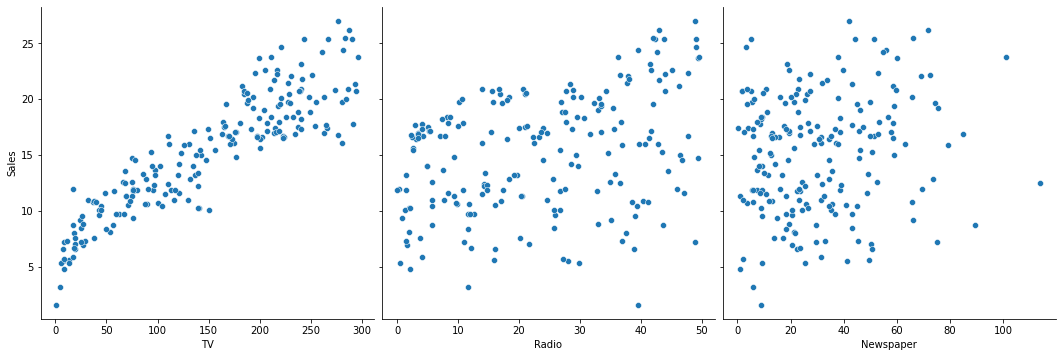

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'],
            y_vars='Sales', height=5, aspect=1, kind='scatter')
plt.show()

In [5]:
#perform the multiple linear regression model
#Equation : Y=w0+w1.x1 + w2.x2 + w3.x3
#Here Y(sales)=w0+w1.x1(TV)+w2.x2(Radio)+w3.x3(Newspaper)
#create x and Y as sales

X = advertising.iloc[:, :-1]
print(X)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]


In [6]:
y = advertising.iloc[:, -1]
print(y)

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train)

        TV  Radio  Newspaper
135   48.3   47.0        8.5
91    28.6    1.5       33.0
85   193.2   18.4       65.7
150  280.7   13.9       37.0
179  165.6   10.0       17.6
..     ...    ...        ...
199  232.1    8.6        8.7
93   250.9   36.5       72.3
126    7.8   38.9       50.6
62   239.3   15.5       27.3
27   240.1   16.7       22.9

[140 rows x 3 columns]


In [8]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
print(regressor.intercept_)

4.409117875403842


In [10]:
print(regressor.coef_)

[0.05461218 0.10297571 0.00615071]


In [11]:
y_pred = regressor.predict(X_test)
for(i,j) in zip(y_test,y_pred):
    if i!=j:
        print("Actual value :",i,"Predicted value :",j)
print("Number of mislabeled points from test data set :", (y_test != y_pred).sum())

Actual value : 24.4 Predicted value : 24.198032090251587
Actual value : 18.0 Predicted value : 17.17323009901707
Actual value : 13.2 Predicted value : 13.063173623432998
Actual value : 23.2 Predicted value : 21.89785907420722
Actual value : 20.2 Predicted value : 21.209508289100768
Actual value : 17.9 Predicted value : 16.73575180263057
Actual value : 17.7 Predicted value : 19.45537704535919
Actual value : 22.3 Predicted value : 20.936970732384133
Actual value : 9.6 Predicted value : 9.550602009516215
Actual value : 11.8 Predicted value : 11.071463114799815
Actual value : 7.6 Predicted value : 6.961192956344838
Actual value : 19.7 Predicted value : 16.552025685790202
Actual value : 13.4 Predicted value : 13.572479040504938
Actual value : 15.2 Predicted value : 14.771105202030057
Actual value : 8.7 Predicted value : 10.381976034875247
Actual value : 19.6 Predicted value : 17.86555127883186
Actual value : 16.6 Predicted value : 17.68715800226949
Actual value : 13.3 Predicted value : 13.0

In [12]:
from sklearn import metrics
print("Mean Absolute error :", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared error :", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared error :", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute error : 1.111820806186447
Mean Squared error : 2.0676959223109863
Root Mean Squared error : 1.437948511703735


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]


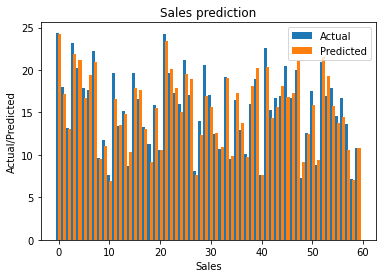

In [13]:
import matplotlib.pyplot as plt
c=X_test['TV'].count()
xax=np.arange(c)
print(xax)
X_axis = np.arange(len(xax))
plt.bar(X_axis-0.2, y_test, 0.6, label='Actual')
plt.bar(X_axis+0.2, y_pred, 0.6, label='Predicted')

plt.xlabel("Sales")
plt.ylabel("Actual/Predicted")
plt.title("Sales prediction")
plt.legend()
plt.show()